In [1]:
import pandas as pd 


In [2]:
df = pd.read_csv('/content/consolidated.csv')

In [3]:
df.head()

,Date,1,2,3,4,5,6,7,8,9,10,11,12,Label,Pct_inc,Bin_label,Up,Down
0,08-09-1998,Boeing gets Varig order,Airbus gets Emirates order,Dow set for early takeoff,CNNfn market movers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inc,1.936619718,Up,1,0
1,09-09-1998,UPS flies with Airbus,Boeing Airbus split order,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dec,-2.590673575,Down,0,1
2,05-10-1998,Boeing boosts output,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inc,2.111324376,Up,1,0
3,07-10-1998,Raytheon cuts 14000 jobs,Open skies' at an impasse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dec,-2.466793169,Down,0,1
4,08-10-1998,Wall Street struggles in pain,Selling pressure eases,Wall Street reels in pain,Wall St. shaken up,More turmoil for U.S. stocks,Yen takes second bite of bond,NaN,NaN,NaN,NaN,NaN,NaN,Dec,-2.946954813,Down,0,1


In [4]:
df2 = df[['1','2','3','4','5','6','7','8','9','10','11','12','Bin_label']]
df2["News Headline"] = ""
for i in range(len(df2)):
  for j in df2.loc[i]:
    if not pd.isna(j):
      df2['News Headline'][i] = df2['News Headline'][i]+". "+str(j)
    else:
      break
df3 = df2[['News Headline','Bin_label']]
df3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,News Headline,Bin_label
0,. Boeing gets Varig order. Airbus gets Emirate...,Up
1,. UPS flies with Airbus. Boeing Airbus split ...,Down
2,. Boeing boosts output,Up
3,. Raytheon cuts 14000 jobs. Open skies' at an ...,Down
4,. Wall Street struggles in pain. Selling press...,Down


In [5]:
df3.head()

,News Headline,Bin_label
0,. Boeing gets Varig order. Airbus gets Emirate...,Up
1,. UPS flies with Airbus. Boeing Airbus split ...,Down
2,. Boeing boosts output,Up
3,. Raytheon cuts 14000 jobs. Open skies' at an ...,Down
4,. Wall Street struggles in pain. Selling press...,Down


In [6]:
features = df3['News Headline'].values
labels = df3['Bin_label'].values

In [7]:
processed_features = []
import re
for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [8]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [10]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0,n_jobs=2)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=2, random_state=0)

In [11]:
predictions = text_classifier.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[  1   0   0]
 [  0 353 290]
 [  0 303 269]]
              precision    recall  f1-score   support

   Bin_label       1.00      1.00      1.00         1
        Down       0.54      0.55      0.54       643
          Up       0.48      0.47      0.48       572

    accuracy                           0.51      1216
   macro avg       0.67      0.67      0.67      1216
weighted avg       0.51      0.51      0.51      1216

0.5123355263157895


>cores=1: 68.273 seconds
>cores=2: 65.410 seconds
>cores=3: 69.049 seconds
>cores=4: 69.798 seconds
>cores=5: 72.409 seconds
>cores=6: 74.255 seconds
>cores=7: 75.624 seconds
>cores=8: 75.740 seconds


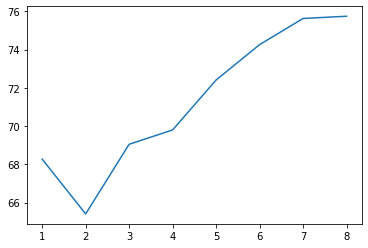

In [13]:
n_cores = [1, 2, 3, 4, 5, 6, 7, 8]
from matplotlib import pyplot
from time import time
results = list()
for n in n_cores:
	# capture current time
	start = time()
	# define the model
	model = RandomForestClassifier(n_estimators=500, n_jobs=n)
	# fit the model
	model.fit(X_train, y_train)
	# capture current time
	end = time()
	# store execution time
	result = end - start
	print('>cores=%d: %.3f seconds' % (n, result))
	results.append(result)
pyplot.plot(n_cores, results)
pyplot.show()

In [14]:
n_cores = [1, 2, 3, 4, 5, 6, 7, 8]
n_cores_mini = [1,2,3,4]
from matplotlib import pyplot
from sklearn.naive_bayes import GaussianNB
from time import time
results = list()
for n in n_cores:
	# capture current time
	start = time()
	# define the model
	gnb = GaussianNB(n_jobs=n)
	# fit the model
	gnb.fit(X_train, y_train)
	# capture current time
	end = time()
	# store execution time
	result = end - start
	print('>cores=%d: %.3f seconds' % (n, result))
	results.append(result)
pyplot.plot(n_cores, results)
pyplot.show()

TypeError: ignored

In [15]:
n_cores = [1, 2, 3, 4, 5, 6, 7, 8]
n_cores_mini = [1,2,3,4]
from sklearn import svm
from matplotlib import pyplot
from sklearn.naive_bayes import GaussianNB
from time import time
results = list()
for n in n_cores:
	# capture current time
	start = time()
	# define the model
	clf = svm.SVC(n_jobs=n)
	# fit the model
	clf.fit(X_train, y_train)
	# capture current time
	end = time()
	# store execution time
	result = end - start
	print('>cores=%d: %.3f seconds' % (n, result))
	results.append(result)
pyplot.plot(n_cores, results)
pyplot.show()

TypeError: ignored

>cores=1: 0.010 seconds
>cores=2: 0.010 seconds
>cores=3: 0.010 seconds
>cores=4: 0.010 seconds
>cores=5: 0.009 seconds
>cores=6: 0.010 seconds
>cores=7: 0.010 seconds
>cores=8: 0.010 seconds


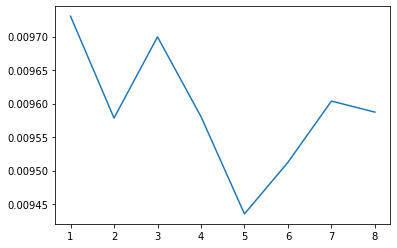

In [16]:
n_cores = [1, 2, 3, 4, 5, 6, 7, 8]
n_cores_mini = [1,2,3,4]
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
from sklearn.naive_bayes import GaussianNB
from time import time
results = list()
for n in n_cores:
	# capture current time
	start = time()
	# define the model
	neigh = KNeighborsClassifier(n_neighbors=5,n_jobs=n)
	# fit the model
	neigh.fit(X_train, y_train)
	# capture current time
	end = time()
	# store execution time
	result = end - start
	print('>cores=%d: %.3f seconds' % (n, result))
	results.append(result)
pyplot.plot(n_cores, results)
pyplot.show()